### resonator fitting, to get internal quality factor and external factor, etc
    two packages are used here, one is scresonators, https://github.com/Boulder-Cryogenic-Quantum-Testbed/scresonators, one is resonator, https://github.com/danielflanigan/resonator
    ---Zhenhai 20230227

In [5]:
import fit_resonator.resonator as scres
from resonator import shunt, see
import Labber
import numpy as np
import matplotlib.pyplot as plt

### fitting with scresonators

In [6]:
logfile = Labber.LogFile(r'C:\Users\T2-1\Dropbox\My PC (T2-1)\Desktop\Zhenhai\data_processing\generalCode\Res_powerscan_2.hdf5') #load the hdf5 file
rawData = logfile.getTraceXY(entry=20) # get the x data and y data for one specific entry
column0, column1, column2 = rawData[0]/1e9, 20*np.log10(np.abs(rawData[1])), np.angle(rawData[1]) # prepare the raw data for the fitting, 1st one for frequency in GHz, 2nd one is the S21 magnitute in dB, 3rd one is the phase in radians
rawData4fit = np.column_stack((column0, column1, column2)) # data shape [column0, column1, column2]

my_resonator = scres.Resonator()
my_resonator.from_columns(rawData4fit)

fit_type = 'DCM'
MC_iteration = 20
MC_rounds = 1e3
MC_fix = ['w1']
manual_init = None

my_resonator.fit_method(fit_type, MC_iteration, MC_rounds=MC_rounds, MC_fix=MC_fix, manual_init=manual_init,
                MC_step_const=0.3)
params1 = my_resonator.fit()
params1

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'C:\Users\T2-1\Dropbox\My PC (T2-1)\Desktop\Zhenhai\data_processing\generalCode\Res_powerscan_2.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

### fit with Danielflanigan resonator

In [ ]:
# for using this code, you need to pieces of packages, one is called Labber, one is called Dainelflanigan resonator which you can find it on github
import lmfit
import scipy.io as sio
import resonator
from resonator import background, shunt, see
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.pyplot as plt
import Labber

ValueError: x and y must have same first dimension, but have shapes (36,) and (71,)

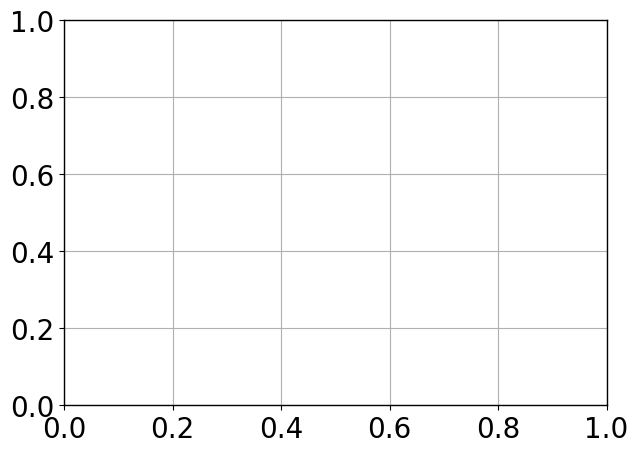

In [ ]:
filename = r"C:\Users\T2-1\Dropbox\My PC (T2-1)\Desktop\Zhenhai\data_processing\generalCode\Res8_powerscan_10dB_2.hdf5" # the file name and the path
Qi = []
Lfile = Labber.LogFile(filename)
freq, _ = Lfile.getTraceXY(entry=2) # get the frequency span used to measure S21, entry can be random number 
S21 = Lfile.getData()
for i in range(np.shape(S21)[0]): 
    r = shunt.LinearShuntFitter(frequency=freq, 
                                data=S21[i, :],
                                background_model=background.MagnitudeSlopeOffsetPhaseDelay())
    Qi.append(r.Q_i)

plt.figure(figsize=(7, 5))
power = np.linspace(10, -60, 36) # the power range used to measure resonator spectroscopy power scan
Qi = np.array(Qi)
plt.plot(power, Qi*1e-6, 'o', color = 'C0', markersize = 6, linewidth = 10)
plt.ylabel("$Q_i$ (1e6)", fontsize=15)
plt.xlabel("VNA power ($dBm$)", fontsize=15)
plt.xticks(fontsize=15)
plt.grid(None)
plt.ylim([0, 0.1e6])
plt.legend(frameon=False,fontsize=15)
plt.show()